### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("framingham.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#checking for each column information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Handling null values

In [5]:
#Checking for null values

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
# filling null values with mean

df.fillna(df.mean(), inplace = True)

In [8]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
# checking for duplicates

duplicates = df.duplicated()

print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


In [10]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [11]:
# # Finding outliers in muliple columns using IQR and Z-score


# # Function to detect outliers using the IQR method for multiple columns
# def detect_outliers_iqr(df, columns):
#     outliers = {}
#     for column in columns:
#         if df[column].dtype in [np.int64, np.float64]:  # Check if the column is numerical
#             Q1 = df[column].quantile(0.25)
#             Q3 = df[column].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     return outliers

# columns_to_check = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# # Detect outliers
# outliers_iqr = detect_outliers_iqr(df, columns_to_check)

# # Print outliers
# for column, data in outliers_iqr.items():
#     print(f"Outliers in column '{column}':")
#     print(data)


Outliers in 'totChol' column:
      male  age  education  currentSmoker  cigsPerDay    BPMeds  \
194      0   42   3.000000              0    0.000000  0.000000   
259      0   60   1.000000              0    0.000000  0.000000   
333      0   55   2.000000              0    0.000000  1.000000   
533      0   53   2.000000              0    0.000000  0.000000   
543      1   47   2.000000              1   18.000000  0.000000   
617      0   51   3.000000              1    3.000000  0.000000   
670      0   65   2.000000              0    0.000000  0.000000   
920      0   60   1.000000              1   15.000000  0.000000   
926      1   61   1.000000              1   20.000000  0.000000   
998      0   57   1.000000              0    0.000000  0.029615   
1103     0   60   4.000000              1   20.000000  0.000000   
1111     0   52   2.000000              0    0.000000  0.000000   
1150     0   46   1.000000              1   10.000000  0.000000   
1389     0   51   2.000000      

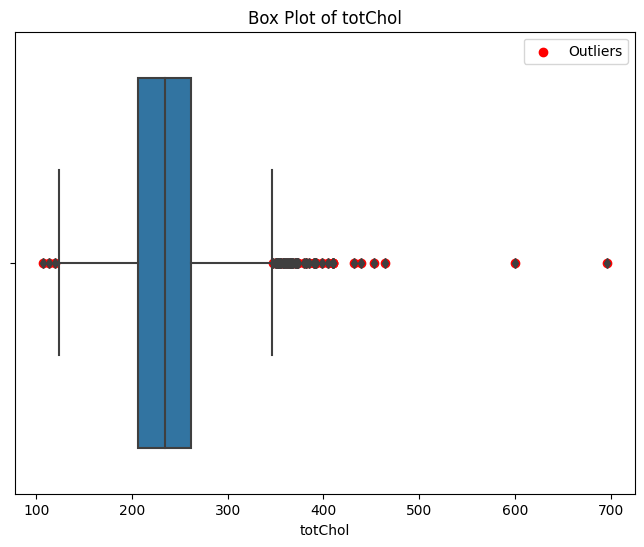

In [12]:
# Calculate IQR for the 'totChol' column
Q1 = df['totChol'].quantile(0.25)
Q3 = df['totChol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'age' column
outliers = df[(df['totChol'] < lower_bound) | (df['totChol'] > upper_bound)]

print("Outliers in 'totChol' column:")
print(outliers)

# Plotting the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['totChol'])
plt.title('Box Plot of totChol')
plt.xlabel('totChol')

# Highlight outlier points in the box plot
plt.scatter(outliers['totChol'], np.zeros(len(outliers)), color='red', label='Outliers')
plt.legend()
plt.show()

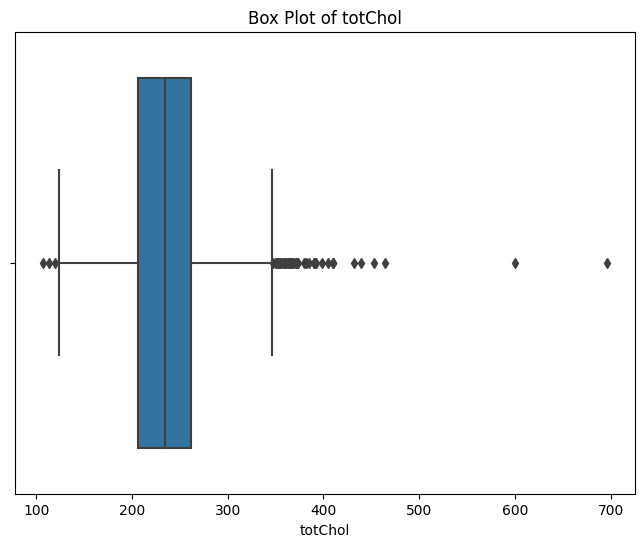

In [13]:
#Checking for outliers in 'totChol'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['totChol'])
plt.title('Box Plot of totChol')
plt.xlabel('totChol')
plt.show()

In [14]:
# Removing outlliers
column = 'totChol'

# Calculate IQR for the column
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Print the number of rows before and after removal
print(f"Number of rows before removal: {df.shape[0]}")
print(f"Number of rows after removal: {df_cleaned.shape[0]}")


Number of rows before removal: 4240
Number of rows after removal: 4183


### Feature Scaling

In [15]:
# Using Max Min Scaler

columns_to_scale = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform them
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

### Defining input features and target variable

In [16]:
# Defining input features and target variable

X = df.drop(columns = ['TenYearCHD'])
y = df['TenYearCHD']

In [17]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,0.184211,4.0,0,0.000000,0.0,0,0,0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0,0.368421,2.0,0,0.000000,0.0,0,0,0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,1,0.421053,1.0,1,0.285714,0.0,0,0,0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,0,0.763158,3.0,1,0.428571,0.0,0,1,0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966
4,0,0.368421,3.0,1,0.328571,0.0,0,0,0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119


In [18]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [56]:
# Splitting dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [57]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1427,0,0.552632,3.0,1,0.285714,0.0,0,0,0,0.193548,0.224586,0.433862,0.207222,0.464646,0.155367
3257,0,0.842105,4.0,1,0.085714,0.0,0,1,0,0.224109,0.281324,0.380952,0.109549,0.111111,0.093220
3822,0,0.157895,3.0,0,0.000000,0.0,0,0,0,0.132428,0.078014,0.253968,0.160204,0.414141,0.121469
1263,0,0.447368,1.0,0,0.000000,0.0,0,0,0,0.276740,0.203310,0.206349,0.267087,0.262626,0.104520
3575,1,0.631579,2.0,1,0.285714,0.0,0,0,0,0.134126,0.153664,0.201058,0.220068,0.262626,0.121469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0.105263,1.0,1,0.071429,0.0,0,1,0,0.195246,0.300236,0.486772,0.272661,0.323232,0.087571
466,0,0.657895,3.0,1,0.214286,0.0,0,0,0,0.242784,0.196217,0.275132,0.134270,0.363636,0.090395
3092,0,0.736842,2.0,0,0.000000,0.0,0,1,0,0.324278,0.234043,0.433862,0.231459,0.393939,0.115819
3772,1,0.184211,2.0,1,0.142857,0.0,0,0,0,0.183362,0.087470,0.174603,0.217159,0.242424,0.062147


In [58]:
X_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1350,0,0.447368,3.0,1,0.142857,0.0,0,0,0,0.259762,0.186761,0.338624,0.183228,0.191919,0.070621
1434,1,0.289474,1.0,1,0.357143,0.0,0,0,0,0.159593,0.177305,0.359788,0.201163,0.262626,0.144068
2500,1,0.342105,1.0,1,0.014286,0.0,0,1,0,0.288625,0.267139,0.380952,0.319922,0.252525,0.096045
1128,0,0.815789,3.0,1,0.142857,0.0,0,1,0,0.219015,0.498818,0.582011,0.299806,0.161616,0.096045
4144,1,0.710526,2.0,0,0.000000,0.0,0,0,0,0.220713,0.226950,0.380952,0.209161,0.464646,0.152542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,1,0.078947,3.0,1,0.214286,0.0,0,0,0,0.151104,0.113475,0.195767,0.172079,0.010101,0.110169
4178,1,0.236842,3.0,1,0.428571,0.0,0,0,0,0.174873,0.231678,0.391534,0.317014,0.242424,0.084746
4193,0,0.815789,1.0,0,0.000000,0.0,0,1,0,0.337861,0.527187,0.603175,0.301018,0.313131,0.132768
2897,0,0.342105,1.0,0,0.000000,0.0,0,0,0,0.310696,0.191489,0.259259,0.210858,0.484848,0.132768


# Objective-1: Building and Training Logistic Regression Model

In [59]:
logreg = LogisticRegression()

In [60]:
#Training model

logreg.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Making predictions

y_pred = logreg.predict(X_test)

# Objective-2: Evaluating model's accuracy

In [62]:
# Evaluating model's accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8596698113207547


In [63]:
confu_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix: \n", confu_matrix)
print("Classification Report: \n", class_report)

Confusion Matrix: 
 [[721   4]
 [115   8]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.67      0.07      0.12       123

    accuracy                           0.86       848
   macro avg       0.76      0.53      0.52       848
weighted avg       0.83      0.86      0.81       848

